# Aprendizaje neuronal de las señales de trafico

In [1]:
import tensorflow as tf

In [2]:
#Para omitir FutureWarning's en el resto del codigo
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Cargar los datos

In [3]:
import os
import skimage.io as im
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
#Creo funcion para leer imagenes de mi carpeta de BelgiumTSC
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
            if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir,f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]        
       
        for f in file_names:
            images.append(im.imread(f))    #Lee imagen 
            labels.append(int(d)) #¿A qué carpeta pertenece la imagen anterior?
    
    return images, labels

In [8]:
#Fijo las rutas que voy a usar
main_path = "../Datasets/BelgiumTSC"
training_dir = os.path.join(main_path,"Training")
testing_dir = os.path.join(main_path,"Testing")

In [9]:
#Leo las imagenes para entrenar 
images_training, labels_training = load_ml_data(training_dir)

## Análisis exploratorio

In [11]:
#Tamaño en bytes de todo el arreglo de imagenes de entrenamiento
images_training.nbytes  

AttributeError: 'list' object has no attribute 'nbytes'

In [12]:
#Tamaño en bytes por imagen
images_training.itemsize  

AttributeError: 'list' object has no attribute 'itemsize'

In [ ]:
#numero de imagenes en el arreglo de imagenes
images_training.nbytes/images_training.itemsize  #Que es total de imagenes

In [ ]:
images_training.ndim  #Dimensiones de mi arreglo de imagenes = 1 columna

In [ ]:
images_training.size  #Tamaño de esa dimension, (numero de imagenes)

In [ ]:
set(labels_training) #Categorias en el arreglo de labels

In [ ]:
len(set(labels_training)) #número de categorias en el arreglo de labels

In [ ]:
images_training.flags  #datos acerca de la carga de datos

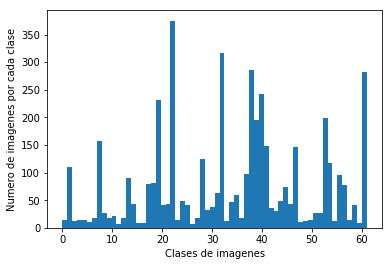

In [14]:
#Histograma de la cantidad de fotos por categoria
plt.hist(labels_training, bins = len(set(labels_training)))  
plt.xlabel("Clases de imagenes")
plt.ylabel("Numero de imagenes por cada clase")
plt.show()

In [7]:
#Elegir muestra aleatoria de tamaño 6 de mi conjunto de imagenes de entrenamiento
muestra =  random.sample(range(len(labels_training)),6)
muestra

[3074, 2361, 776, 3451, 2982, 1603]

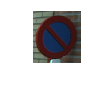

Forma:(142, 131, 3) ; Mín color: 5 ; Máx color: 255


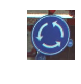

Forma:(95, 92, 3) ; Mín color: 28 ; Máx color: 255


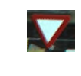

Forma:(55, 63, 3) ; Mín color: 0 ; Máx color: 255


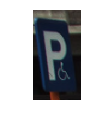

Forma:(165, 88, 3) ; Mín color: 2 ; Máx color: 169


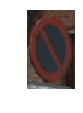

Forma:(92, 56, 3) ; Mín color: 14 ; Máx color: 205


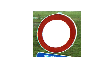

Forma:(242, 251, 3) ; Mín color: 0 ; Máx color: 255


In [17]:
#Visualizo las imagenes obtenidas de la muestra aleatoria
for i in range(len(muestra)):
    img_temp = images_training[muestra[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(img_temp)
    #plt.subplots_adjust(wspace=0.5)
    plt.show()    
    print("Forma:{0} ; Mín color: {1} ; Máx color: {2}".format(img_temp.shape, #shape=(alto,ancho,escala de colores)
                                                               img_temp.min(), #min=el minimo de color en sus pixeles
                                                               img_temp.max())) #max=el maximo de color en sus pixeles

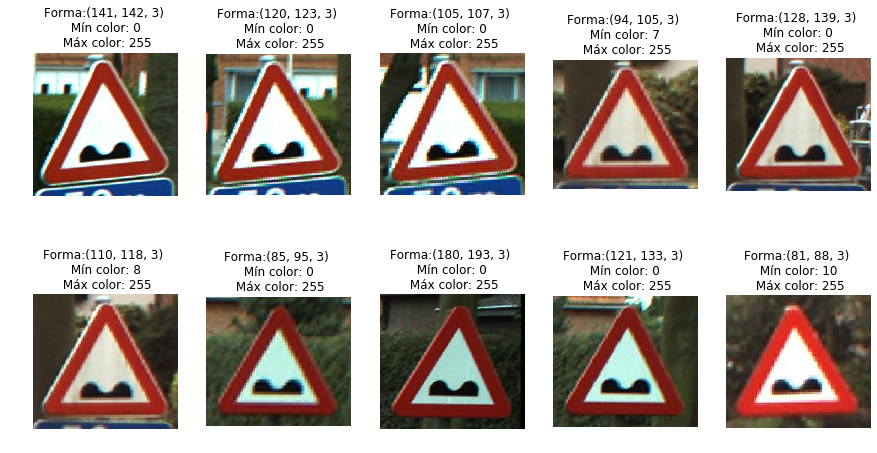

In [46]:
#Visualizo las 10 primeras imagenes
plt.figure(figsize=(15,8))
for i in range(10):
    img_temp = images_training[i]
    plt.subplot(2,5,i+1)
    plt.axis("off")
    plt.title("Forma:{0} \n Mín color: {1} \n Máx color: {2}".format(img_temp.shape, #shape=(alto,ancho,escala de colores)
                                                               img_temp.min(), #min=el minimo de color en sus pixeles
                                                               img_temp.max()))#Muestro la clase y el numero de ejemplares
    plt.imshow(img_temp)

plt.show()

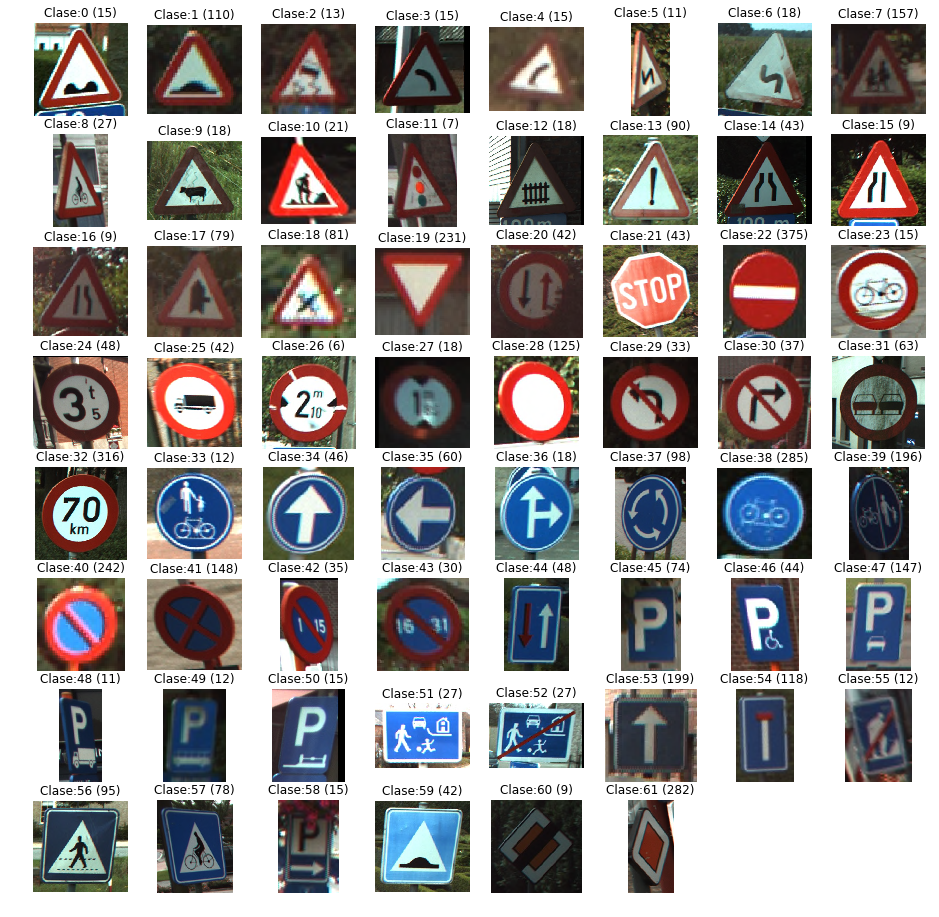

In [14]:
#Visualizo el primer ejemplar de cada tipo de señal de transito
unique_labels = set(labels_training)
plt.figure(figsize=(16,16))
i=1
for categoria in unique_labels:
    img_temp = images_training[list(labels_training).index(categoria)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase:{0} ({1})".format(categoria,list(labels_training).count(categoria)))#Muestro la clase y el numero de ejemplares
    i+=1
    plt.imshow(img_temp)

plt.show()

In [ ]:
#Busco conocer las imagenes
images_training[0].shape #filas,columnas,colores de la primera imagen de entrenamiento

In [ ]:
images_training[0].size #tamaño de la primera imagen:filas*columnas*colores

In [ ]:
images_training[0]  # pixeles; cada pixel=[R,G,B] escala del 0 al 255

## Tratamiento de imágenes

* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribucion de señales de tráfico no es uniforme (algunas salen más veces que otras)

### Reescalado

In [7]:
#libreria para reescalar las imagenes
from skimage import transform

In [8]:
#Quiero conocer el tamaño mas pequeño de las imagenes, para saber a qué tamaño reescalar todas después.
w=9999
h=9999
for image in images_training:
    if image.shape[0]<h:
        h=image.shape[0]
    if image.shape[1]<w:
        w=image.shape[1]
print("Tamaño minimo: h={0}  w={1}".format(h,w))

Tamaño minimo: h=22  w=20


In [9]:
#Reescalar las imagenes a tamaño de 30x30 pixeles
images30 = [transform.resize(image,(30,30)) for image in images_training ]  #creo nueva lista

C:\Users\jvill\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\jvill\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [10]:
#corroboro la nueva dimension
images30[0].shape

(30, 30, 3)

In [ ]:
#Visualizo muestra reescalada
muestra =  random.sample(range(len(labels_training)),6)
muestra
for i in range(len(muestra)):
    img_temp = images30[muestra[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(img_temp)
    #plt.subplots_adjust(wspace=0.5)
    plt.show()    
    print("Forma:{0} ; Mín color: {1} ; Máx color: {2}".format(img_temp.shape, #shape=(alto,ancho,escala de colores)
                                                               img_temp.min(), #min=el minimo de color en sus pixeles
                                                               img_temp.max())) #max=el maximo de color en sus pixeles

### Colores a grises

In [11]:
#Libreria para convertir colores a escala de grises
from skimage.color import rgb2gray

In [12]:
#Convierto las nuevas imagenes reescaladas a escala de grises
images30 = np.array(images30)  #Convierto la lista a arreglo
images30 = rgb2gray(images30)  #Convierto las imagenes a escala de grises

In [ ]:
images30[0]  #Reviso la primera imagen en escala de grises

In [14]:
images30[0].shape

(30, 30)

In [ ]:
#Visualizo muestra de 6 imagenes en nuevo tamaño y nueva escala de colores
muestra =  random.sample(range(len(labels_training)),6)
muestra
for i in range(len(muestra)):
    img_temp = images30[muestra[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(img_temp,cmap="gray")
    #plt.subplots_adjust(wspace=0.5)
    plt.show()    
    print("Forma:{0} ; Mín color: {1} ; Máx color: {2}".format(img_temp.shape, #shape=(alto,ancho,escala de colores)
                                                               img_temp.min(), #min=el minimo de color en sus pixeles
                                                               img_temp.max())) #max=el maximo de color en sus pixeles

## Modelo de Red Neuronal con TensorFlow

### Creación del modelo

In [15]:
#Puntos de entrada de la red:
x = tf.placeholder(dtype = tf.float32, shape = [None,30,30])  #Imagenes entrantes de 30x30
y = tf.placeholder(dtype = tf.int32, shape = [None])          #Vector de respuestas con La clase a la que pertenece cada imagen

#Convierte las matrices de 30x30 a listas de 900
images_flat = tf.contrib.layers.flatten(x)  

# En este ejercicio utilizaremos la red neuronal para hacer una clasificacion logistica con 62 salidas.
# Mientras que la regresion se utiliza para predecir variables continuas,
# la clasificacion se utiliza para predecir variables discretas.

#Capa de conexion: tf.contrib.layers.fully_connected(inputs,num_outputs,activation_fn)
logits = tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)
#Los logits seran las funciones que operarán con todos los valores antes de convertirse en valores de salida 
#de las capas anteriores de las capas internas de la red.

#Funcion de perdida:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))
#Mide el error de probabilidad en la Clasificacion discreta dura (donde las labels son mutuamente excluyentes).
#Obtiene un tensor y luego calcula el promedio de todos sus elementos a traves de todas las dimensiones del tensor

#Optimizador:
train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
#Usa algoritmo de Adam para minimizar la funcion de costo

#tf.train.AdamOptimizer(learning_rate=0.001).variables()

#Prediccion final:
final_pred = tf.argmax(logits,1)
#Devuelve el índice con el valor más grande en los ejes de un tensor.
#En este caso se obtiene el indice del mayor valor para cada individuo respecto a las 62 clases.

#Precisión del modelo: Para revisar la eficacia del modelo
accuracy = tf.reduce_mean(tf.cast(final_pred,tf.float32))
#tf.cast, convierte final_pred en tipo float32. 
#Luego se calcula el promedio sobre cada dimension del tensor, reduciendola.


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer.


### Ejecutar Red Neuronal

In [40]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

#Iteraciones para aprendizaje
for i in range(601):
    _, accuracy_val, loss_val = sess.run([train_opt,accuracy,loss], feed_dict = {x:images30,y:list(labels_training)})
    
    if i%50==0:
        print("Epoch",i)
        print("Eficacia =",accuracy_val)
        print("Perdida =",loss_val)


Epoch 0
Eficacia = 22.317377
Perdida = 4.2732973
Epoch 50
Eficacia = 33.50754
Perdida = 2.580655
Epoch 100
Eficacia = 33.46951
Perdida = 2.1407712
Epoch 150
Eficacia = 33.3259
Perdida = 1.9348527
Epoch 200
Eficacia = 33.27585
Perdida = 1.8060464
Epoch 250
Eficacia = 33.225357
Perdida = 1.7139665
Epoch 300
Eficacia = 33.16481
Perdida = 1.643704
Epoch 350
Eficacia = 33.100327
Perdida = 1.5878063
Epoch 400
Eficacia = 33.03388
Perdida = 1.5420018
Epoch 450
Eficacia = 32.970272
Perdida = 1.5036088
Epoch 500
Eficacia = 32.913445
Perdida = 1.4708297
Epoch 550
Eficacia = 32.849834
Perdida = 1.4424144
Epoch 600
Eficacia = 32.84787
Perdida = 1.4174272


### Evaluación del modelo de red neuronal

In [ ]:
#Cargo las imagenes para testing
images_testing, labels_testing = load_ml_data(testing_dir)

In [17]:
#Tratamiento de imagenes de prueba:
test_images30 = [transform.resize(image,(30,30)) for image in images_testing ]  #Reescalo a 30x30
test_images30 = rgb2gray(np.array(test_images30))  #Convierto las imagenes a escala de grises

C:\Users\jvill\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\jvill\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [44]:
#Prediccion de imagenes de prueba
prediction = sess.run([final_pred], feed_dict = {x:test_images30})[0]

In [45]:
#Aciertos en la prediccion
match_count = sum([int(yr==yp) for yr, yp in zip(labels_testing,prediction)])
match_count

1770

In [46]:
#Porcentaje de aciertos en la prediccion
acc = match_count/len(labels_testing)*100
print("Eficacia de la red neuronal: {:.3f}".format(acc))

Eficacia de la red neuronal: 70.238


In [47]:
#Tomo muestra de imagenes de testing con sus respectivas etiquetas
sample_idx = random.sample(range(len(test_images30)),40)
sample_images = [test_images30[i] for i in sample_idx]
sample_labels = [labels_testing[i] for i in sample_idx]

In [48]:
#Genero la prediccion para la muestra de imagenes
prediction = sess.run([final_pred], feed_dict = {x:sample_images})[0]
prediction

array([17, 28, 40, 54, 32, 37, 22, 17, 32, 31, 38, 61, 32, 61, 22, 38,  1,
       35, 35, 32, 32, 38, 32, 40, 13, 19, 38, 22, 17, 19, 22, 40, 19, 40,
       61, 22, 28, 32, 18, 22], dtype=int64)

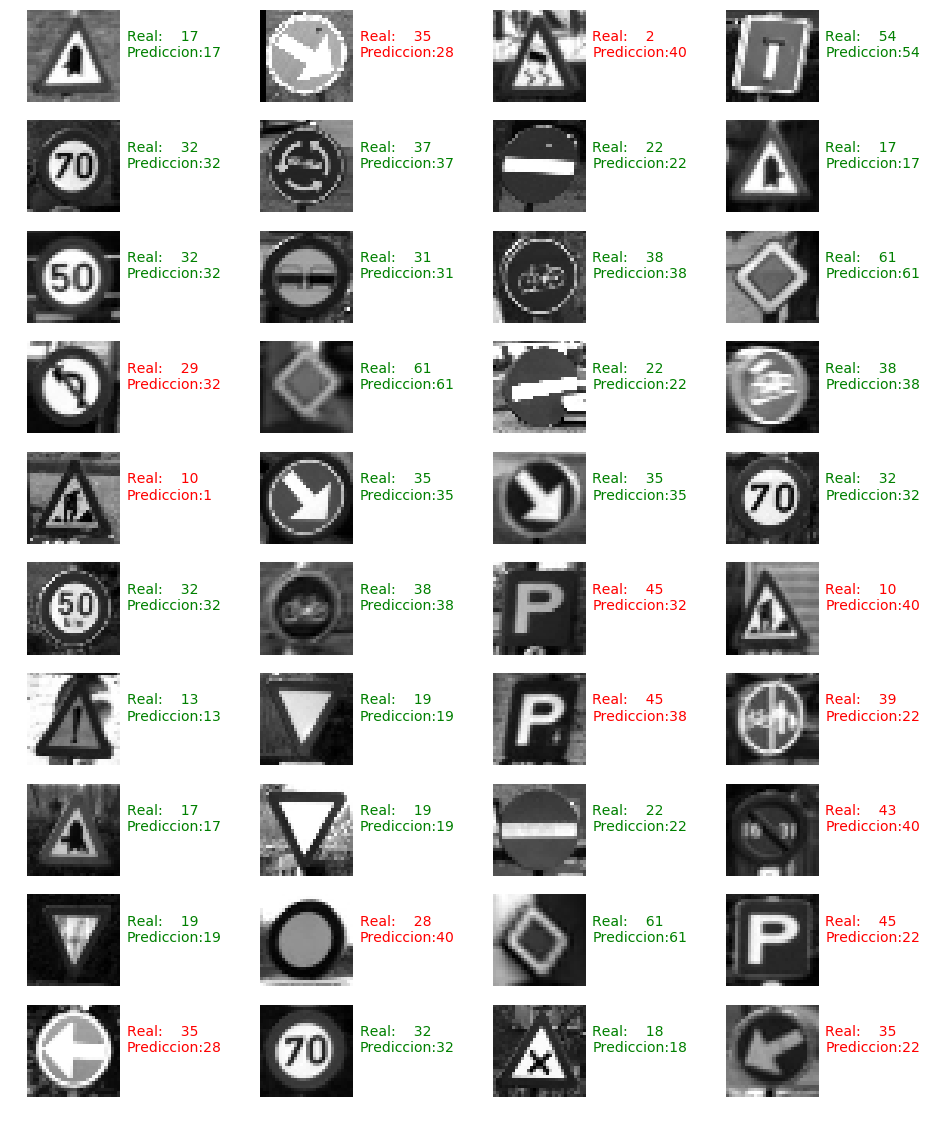

In [49]:
#Comparo las etiquetas reales con la prediccion para la muestra de imagenes
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    real = sample_labels[i]
    predic = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    colores = "green" if real==predic else "red"
    plt.text(32,15,"Real:    {0}\nPrediccion:{1}".format(real,predic),fontsize=14,color=colores)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [ ]:
sess.close()